In [15]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

In [26]:
#Store the data into a variable 
import csv

fname = "AAPL.csv"
file = pd.read_csv(fname)

file = file.set_index(pd.DatetimeIndex(file['Date'].values))
file

,Date,Open,High,Low,Close,Adj Close,Volume
2019-11-21,2019-11-21,65.922501,66.002502,65.294998,65.502502,64.414268,121395200
2019-11-22,2019-11-22,65.647499,65.794998,65.209999,65.445000,64.357727,65325200
2019-11-25,2019-11-25,65.677498,66.610001,65.629997,66.592499,65.486168,84020400
2019-11-26,2019-11-26,66.735001,66.790001,65.625000,66.072502,64.974815,105207600
2019-11-27,2019-11-27,66.394997,66.995003,66.327499,66.959999,65.847565,65235600
...,...,...,...,...,...,...,...
2020-11-16,2020-11-16,118.919998,120.989998,118.150002,120.300003,120.300003,91183000
2020-11-17,2020-11-17,119.550003,120.669998,118.959999,119.389999,119.389999,74271000
2020-11-18,2020-11-18,118.610001,119.820000,118.000000,118.029999,118.029999,76322100
2020-11-19,2020-11-19,117.589996,119.059998,116.809998,118.639999,118.639999,74113000


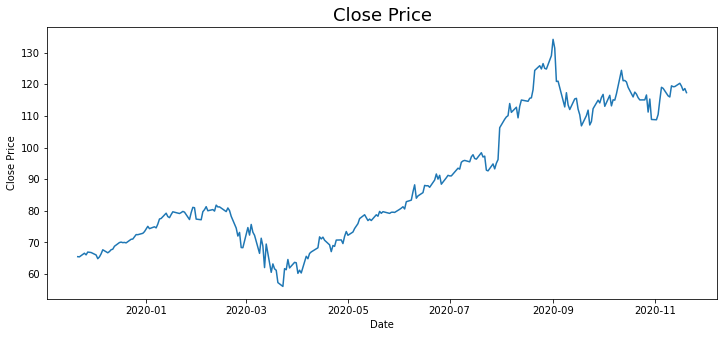

In [27]:
#Visually show the close price

plt.figure(figsize=(12,5))
plt.title('Close Price', fontsize=18)
plt.plot(file['Close'])
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Close Price', fontsize = 10)
plt.show()

In [28]:
#Calculate the three moving average 
#Calculate the short/fast exponential moving average 
ShortEMA = file.Close.ewm(span=5, adjust=False).mean()
#Calculate the Middle/Medium exponential moving average 
MiddleEMA = file.Close.ewm(span=21, adjust=False).mean()
#Calculate the long/slow exponential moving average 
LongEMA = file.Close.ewm(span=63, adjust=False).mean()

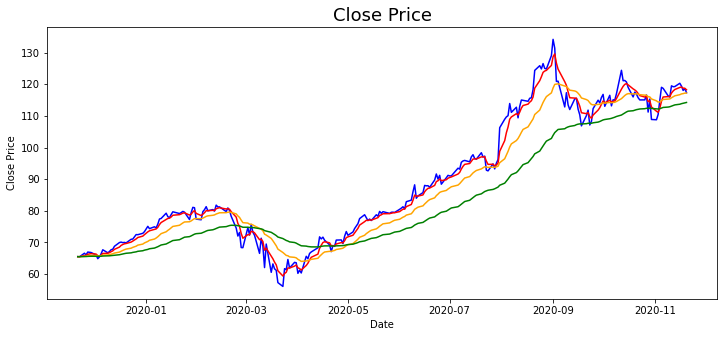

In [29]:
plt.figure(figsize=(12,5))
plt.title('Close Price', fontsize=18)
plt.plot(file['Close'], label='Close Price', color='blue')
plt.plot(ShortEMA, label='Close Price', color='red')
plt.plot(MiddleEMA, label='Close Price', color='orange')
plt.plot(LongEMA, label='Close Price', color='green')
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Close Price', fontsize = 10)
plt.show()

In [30]:
file['Short'] = ShortEMA
file['Middle'] = MiddleEMA
file['Long'] = LongEMA

file

,Date,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long
2019-11-21,2019-11-21,65.922501,66.002502,65.294998,65.502502,64.414268,121395200,65.502502,65.502502,65.502502
2019-11-22,2019-11-22,65.647499,65.794998,65.209999,65.445000,64.357727,65325200,65.483335,65.497275,65.500705
2019-11-25,2019-11-25,65.677498,66.610001,65.629997,66.592499,65.486168,84020400,65.853056,65.596840,65.534824
2019-11-26,2019-11-26,66.735001,66.790001,65.625000,66.072502,64.974815,105207600,65.926205,65.640082,65.551626
2019-11-27,2019-11-27,66.394997,66.995003,66.327499,66.959999,65.847565,65235600,66.270803,65.760075,65.595638
...,...,...,...,...,...,...,...,...,...,...
2020-11-16,2020-11-16,118.919998,120.989998,118.150002,120.300003,120.300003,91183000,118.987362,116.693902,113.679711
2020-11-17,2020-11-17,119.550003,120.669998,118.959999,119.389999,119.389999,74271000,119.121575,116.939002,113.858158
2020-11-18,2020-11-18,118.610001,119.820000,118.000000,118.029999,118.029999,76322100,118.757716,117.038184,113.988528
2020-11-19,2020-11-19,117.589996,119.059998,116.809998,118.639999,118.639999,74113000,118.718477,117.183803,114.133886


In [31]:
#Create the function to buy and sell the stock 

def buy_sell_function(data):
    
    buy_list = []
    sell_list = []
    flag_long = False 
    flag_short = False
    
    for i in range(0, len(data)):
        if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_short = True 
        elif flag_short == True and data['Short'][i] > data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_short = False
        elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_long = True 
        elif flag_long == True and data['Short'][i] < data['Middle'][i]:
            sell_list.append(data['Close'][i])
            buy_list.append(np.nan)
            flag_long = False
        else: 
            buy_list.append(np.nan)
            sell_list.append(np.nan)
        
    return (buy_list, sell_list)

In [32]:
#Add the buy and the sell signals to the data set 
file['Buy'] = buy_sell_function(file)[0]
file['Sell'] = buy_sell_function(file)[1]

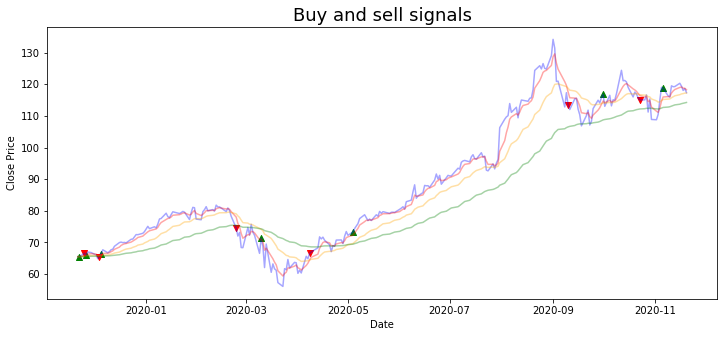

In [33]:
#Visually show the stock buy and sell signals 
plt.figure(figsize=(12,5))
plt.title('Buy and sell signals', fontsize=18)
plt.plot(file['Close'], label='Close Price', color='blue', alpha=0.35)
plt.plot(ShortEMA, label='Close Price', color='red', alpha=0.35)
plt.plot(MiddleEMA, label='Close Price', color='orange', alpha=0.35)
plt.plot(LongEMA, label='Close Price', color='green', alpha=0.35)
plt.scatter(file.index, file['Buy'], color='green', marker='^', alpha=1)
plt.scatter(file.index, file['Sell'], color='red', marker='v', alpha=1)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Close Price', fontsize = 10)
plt.show()

In [34]:
file

,Date,Open,High,Low,Close,Adj Close,Volume,Short,Middle,Long,Buy,Sell
2019-11-21,2019-11-21,65.922501,66.002502,65.294998,65.502502,64.414268,121395200,65.502502,65.502502,65.502502,NaN,NaN
2019-11-22,2019-11-22,65.647499,65.794998,65.209999,65.445000,64.357727,65325200,65.483335,65.497275,65.500705,65.445000,NaN
2019-11-25,2019-11-25,65.677498,66.610001,65.629997,66.592499,65.486168,84020400,65.853056,65.596840,65.534824,NaN,66.592499
2019-11-26,2019-11-26,66.735001,66.790001,65.625000,66.072502,64.974815,105207600,65.926205,65.640082,65.551626,66.072502,NaN
2019-11-27,2019-11-27,66.394997,66.995003,66.327499,66.959999,65.847565,65235600,66.270803,65.760075,65.595638,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-16,2020-11-16,118.919998,120.989998,118.150002,120.300003,120.300003,91183000,118.987362,116.693902,113.679711,NaN,NaN
2020-11-17,2020-11-17,119.550003,120.669998,118.959999,119.389999,119.389999,74271000,119.121575,116.939002,113.858158,NaN,NaN
2020-11-18,2020-11-18,118.610001,119.820000,118.000000,118.029999,118.029999,76322100,118.757716,117.038184,113.988528,NaN,NaN
2020-11-19,2020-11-19,117.589996,119.059998,116.809998,118.639999,118.639999,74113000,118.718477,117.183803,114.133886,NaN,NaN
